In [5]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (8,6)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [6]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

Rsun= 6.9598e10
secyer=3600*24*365

In [7]:
DATA='./CCA-relaxation-project/' 
#DATA='./ms1_mp0.001_rp0.1_rs4_a4.5_tides/' 
DATA='./ms1_mp0.001_rp0.1_rs10_a10.5_tides/' 

DATA='./template/' 


In [8]:
#h = mr.MesaData(DATA+'history_r5_proper.data')
h = mr.MesaData(DATA+'LOGS/'+'history.data')


From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220220', 50.0, 1000.0]


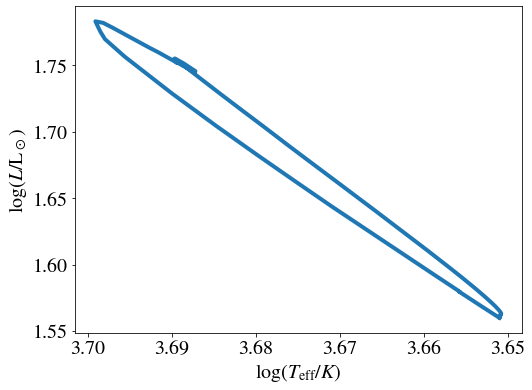

In [6]:
logl=h.log_L
logt=h.log_Teff

plt.plot(logt,logl,linewidth=4)

#plt.axis([3.87,3.65, 1, 2.1])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.gca().invert_xaxis()

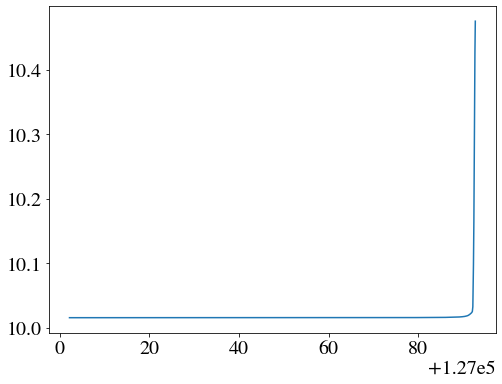

In [7]:
# Find where engulfment occurs
eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
star_radius=10**h.log_R
model= h.model_number
#print(eng_f)
eng=np.where(eng_f>0)
dest = np.where(dest_f<1)
#print(dest_f)
#print(dest)
star_radius=10**h.log_R
age=(h.star_age)

sel = np.where(np.in1d(dest,eng))
#print(sel)
plt.plot(age[sel],star_radius[sel])

(127091.70269865113,
 127092.70269865113,
 10.015358178172265,
 10.499729375947654)

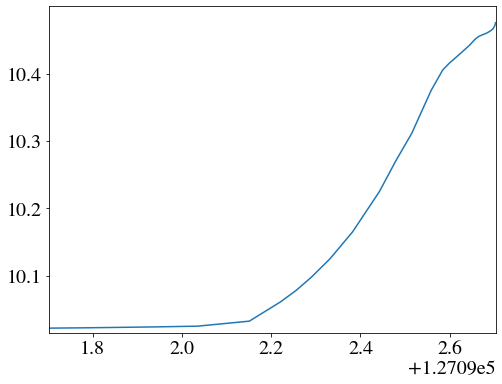

In [8]:
plt.plot(age[sel],star_radius[sel])
plt.axis([age[sel][-1]-1,age[sel][-1], np.min(star_radius),np.max(star_radius)])


Text(0, 0.5, '$\\log \\left( L / {\\rm L}_\\odot \\right)$')

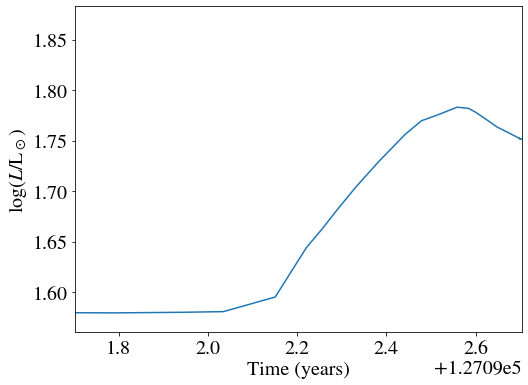

In [9]:
plt.plot(age[sel],logl[sel])
plt.axis([age[sel][-1]-1,age[sel][-1], np.min(logl),np.max(logl)+0.1])

#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
#plt.axis([0,0.55e6, 0.7, 2.5])
plt.xlabel(r'Time (years)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

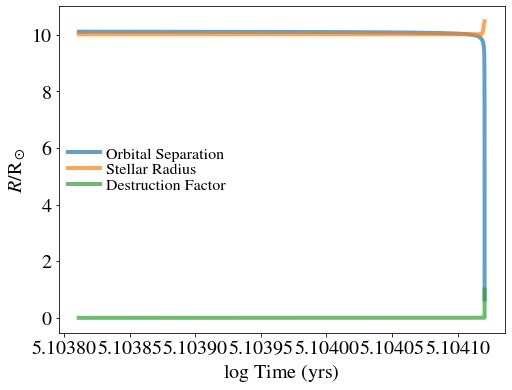

In [10]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(np.log10(age[sel]),planet_location[sel],linewidth=4,alpha=0.7,label=' Orbital Separation')
plt.plot(np.log10(age[sel]),star_radius[sel],linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(np.log10(age[sel]),dest_f[sel],linewidth=4,alpha=0.7,label=' Destruction Factor')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([3,6, -1 , 5.9])
plt.xlabel(r'$\log$ Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

9.795704411541376e+44


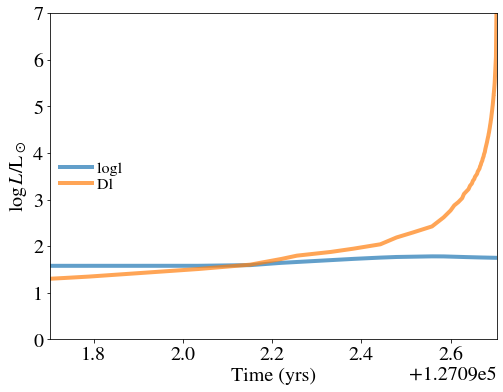

In [11]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer
lsun = 3.839e33
secyer = 3600*24*365
mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
dl = 10**injected_e/((10**logdt)*secyer)



#plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
#plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age[sel],logl[sel],linewidth=4,alpha=0.7,label=' logl')
plt.plot(age[sel],np.log10(dl[sel]/lsun),linewidth=4,alpha=0.7,label=' Dl')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([.542696e6,0.542698e6, -1 , 8])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')
plt.axis([age[sel][-1]-1,age[sel][-1], 0,7])

print(sum(10**injected_e))

9.795704411541376e+44


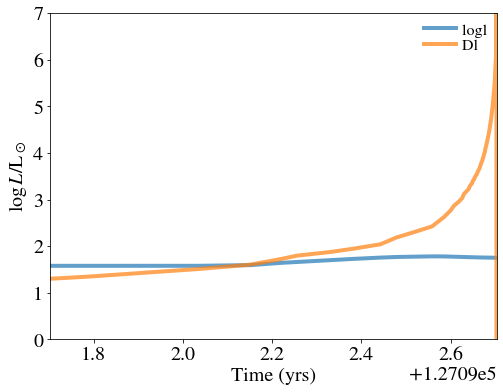

In [12]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer
lsun = 3.839e33
secyer = 3600*24*365
mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
dl = 10**injected_e/((10**logdt)*secyer)



#plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
#plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age,logl,linewidth=4,alpha=0.7,label=' logl')
plt.plot(age,np.log10(dl/lsun),linewidth=4,alpha=0.7,label=' Dl')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="upper right",fontsize=16)
plt.axis([age[sel][-1]-1,age[sel][-1], 0,7])


plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')

print(sum(10**injected_e))

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

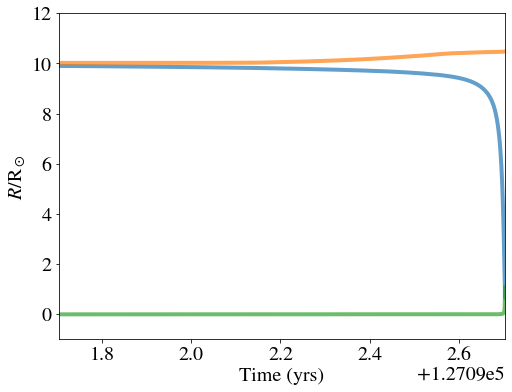

In [13]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location,linewidth=4,alpha=0.7)
plt.plot(age,star_radius,linewidth=4,alpha=0.7)
plt.plot(age,dest_f,linewidth=4,alpha=0.7)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([2690,2701.5, 3.95, 4.15])
plt.axis([age[sel][-1]-1,age[sel][-1], -1,12])

plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

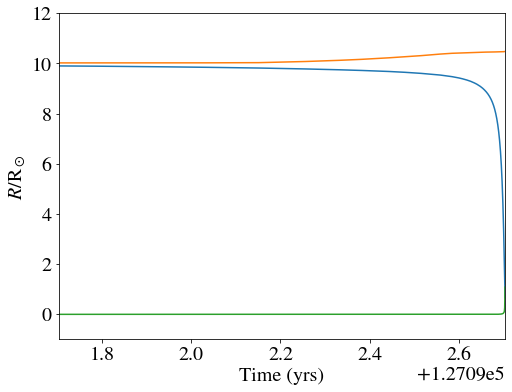

In [14]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
infall_velocity=h.Infall_velocity
dt=10**h.log_dt
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
c_sound=h.Sound_speed
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location)
plt.plot(age,star_radius)
plt.plot(age,dest_f)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([age[sel][-1]-1,age[sel][-1], -1,12])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

Text(0, 0.5, '$ v / c_s$')

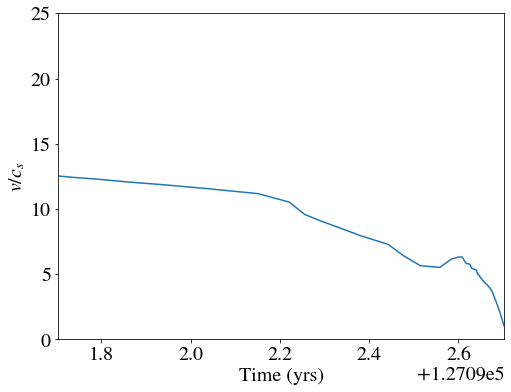

In [15]:
# PLOT: $(vtan^2+vrad^2)^{0.5}$ / cs as function of time 
vr=(infall/1e5)/dt
#print(vr[sel])
#print(v_orb[sel])
#print(c_sound[sel])
#print(max(infall/dt))
plt.plot(age[sel],v_orb[sel]/c_sound[sel])
plt.plot(age[sel],vr[sel]/c_sound[sel],c='red')
plt.axis([age[sel][-1]-1,age[sel][-1], 0,25])

plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ v / c_s$')

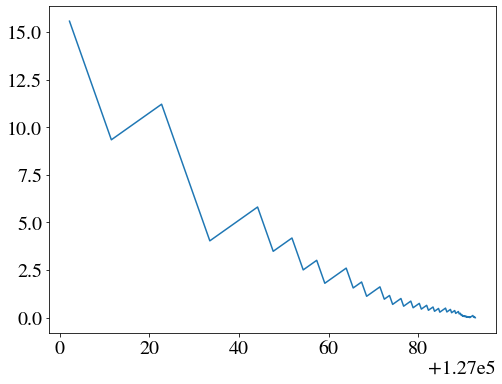

In [16]:
#plt.plot(age[sel],infall[sel]/c.rsun)
plt.plot(age[sel],dt[sel])

Text(0, 0.5, '$\\log v_{\\rm r}$ [km/s] ')

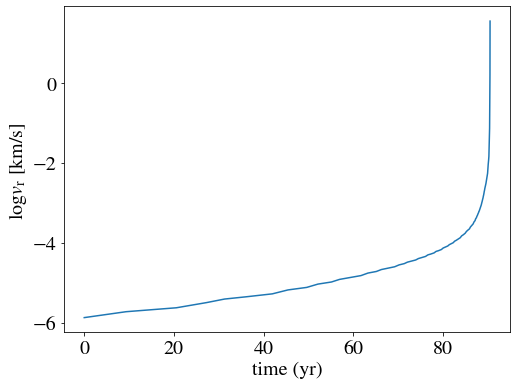

In [17]:
#plt.plot(age[sel],infall[sel]/c.rsun)
#plt.plot(age[sel],np.log10(infall[sel]))
plt.plot((age[sel]-age[sel][0]),np.log10((infall[sel]/dt[sel])/secyer/1e5))
plt.xlabel(r'time (yr)')
plt.ylabel(r'$\log v_{\rm r}$ [km/s] ')
#plt.plot(age[sel],np.log10(infall_velocity[sel]))
#print(infall_velocity[sel])

(90.0, 90.55, -2.3, 1.9)

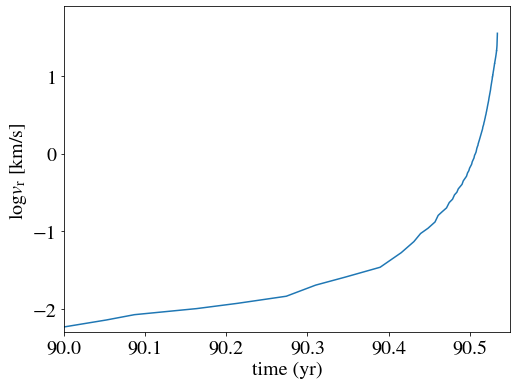

In [18]:
#plt.plot(age[sel],infall[sel]/c.rsun)
#plt.plot(age[sel],np.log10(infall[sel]))
plt.plot((age[sel]-age[sel][0]),np.log10((infall[sel]/dt[sel])/secyer/1e5))
plt.xlabel(r'time (yr)')
plt.ylabel(r'$\log v_{\rm r}$ [km/s] ')
plt.axis([90,90.55, -2.3,1.9])
#plt.plot(age[sel],np.log10(infall_velocity[sel]))
#print(infall_velocity[sel])

In [19]:
import mesaPlot as mp
#f='template/LOGS/'
m=mp.MESA()


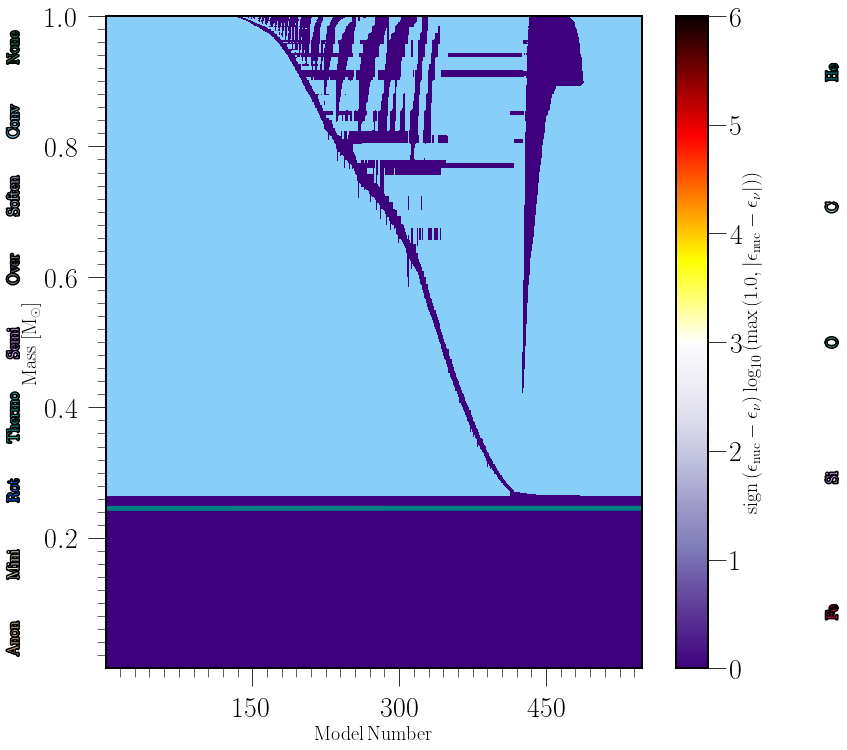

In [20]:
import mesaPlot as mp
m=mp.MESA()
p=mp.plot()
m.loadHistory('template/LOGS/')
p.plotKip(m,show_mass_loc=True)

template/LOGS///profile1.data


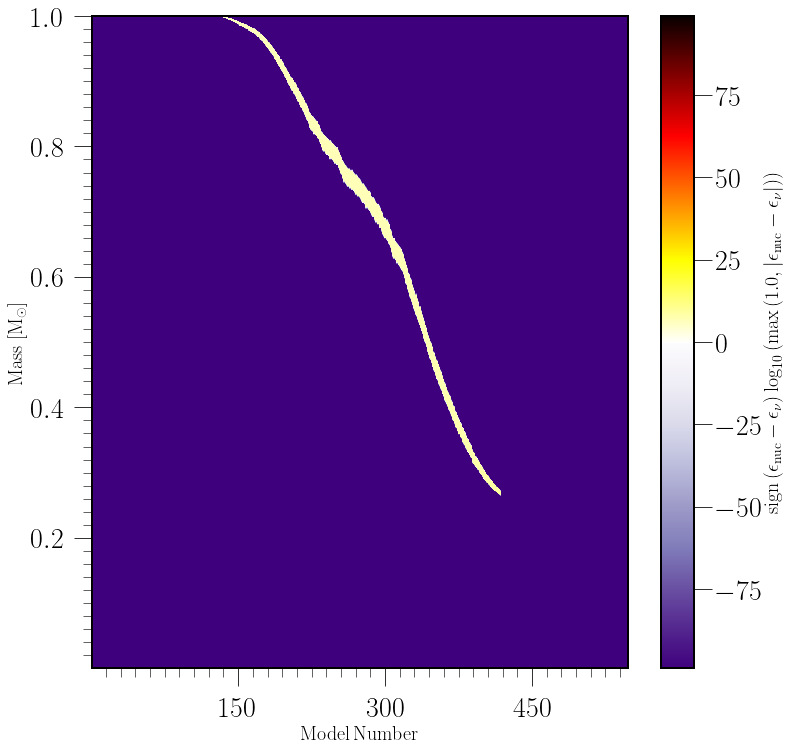

In [21]:
import mesaPlot as mp
m=mp.MESA()
m.loadHistory('template/LOGS/')
m.loadProfile(num=1)
p=mp.plot()
#p.plotKip3(m,plot_type='profile',xaxis='model_number',yaxis='mass',zaxis='engulfment_heating')# ,mod_min=1,mod_max=3000)
p.plotKip3(m,plot_type='profile',xaxis='model_number',yaxis='mass',zaxis='engulfment_heating')# ,mod_min=1,mod_max=3000)

template/LOGS/ ['template/LOGS/']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


(0.0, 12.0)

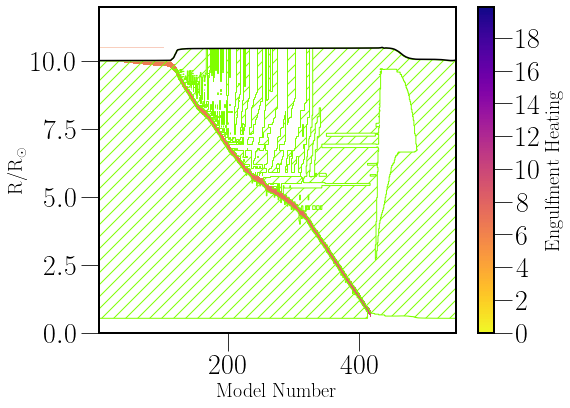

In [22]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
#plot of Helium abundance against time, independent decoration
fig = plt.figure()
axis = plt.gca()
#mkipp.kipp_plot returns an object containing
#   kipp_plot.contour_plot : the return value of matplotlibs contourf. Can be
#                            used to create a colorbar with plt.colorbar() 
#   kipp_plot.histories    : list of history files read. data can be accesed from this
#                            using the get("column_name") function
#   kipp_plot.xlims        : limits of data in x coordinate
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs = ['template/LOGS/'],
        xaxis = "model_number",
        yaxis = "radius",
        identifier = "engulfment_heating",
        log10_on_data = False,
        #num_levels = 5, 
        levels = np.arange(0.0,20,0.1),
        contour_colormap = plt.get_cmap("plasma_r"),
        #levels = np.arange(0,20,0.1),
        #yresolution = 1000,
        #mass_tolerance = 0.0000001,
        decorate_plot = False,
        save_file = False), axis = axis)
bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label("Engulfment Heating")
axis.set_xlabel("Model Number")
axis.set_ylabel(r"R/R$_\odot$")
axis.set_xlim(kipp_plot.xlims)
axis.set_ylim(0,12)
#plt.savefig("Kippenhahn3.png")

9.795704411541376e+44


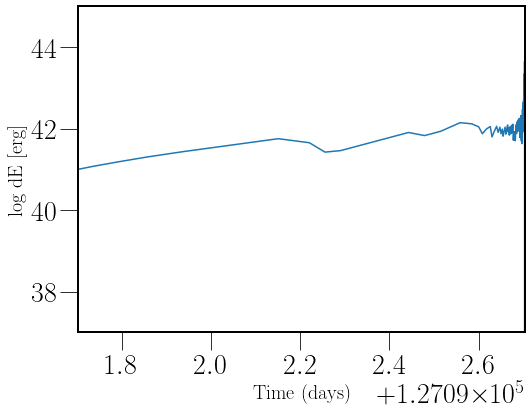

In [23]:
plt.plot(age,injected_e)
#plt.plot(age,star_radius)
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([age[sel][-1]-1,age[sel][-1], 37,45])
plt.xlabel(r'Time (days)')
plt.ylabel(r'$\log  $ dE [erg]')
dt=10**logdt
print(sum(10**injected_e))

## Orbital Evolution Plots (in polar coordinates)

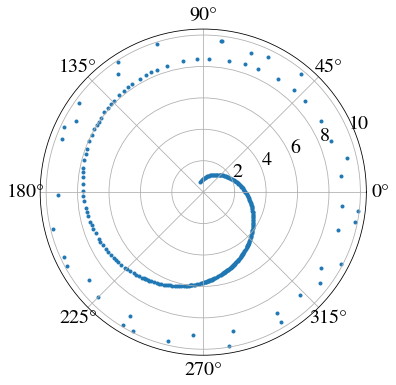

In [64]:
# Number of orbits per timesep 
age=(h.star_age)#*365.0
r=h.Orbital_separation*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Identify plunge-in phase 

i=0
while (f[i] <= 0.0):
    i=i+1
# Beginning of plunge-in phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)):
    j=j+1
    
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1) and (r[i] > min(r)):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
ax.scatter(alpha[j:i] , r[j:i]/c.rsun,marker=".")
#print(alpha[j:i])
#print(r[j:i])
ax.set_rscale('linear')

## Interpolate to increase resolution in early phases

316 316


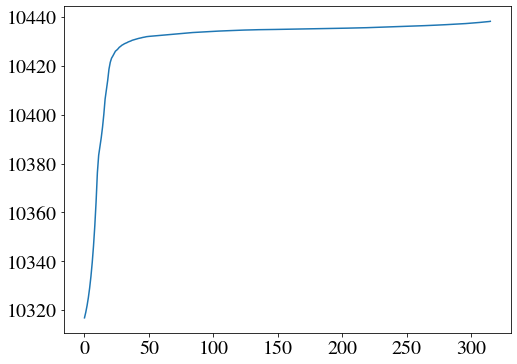

In [65]:
from scipy.interpolate import interp1d

# Arrays for interpolation
x = alpha[j:i]
y = r[j:i]/c.rsun

print(len(x),len(y))

plt.plot(x)
# 1D interpolation


In [66]:
f = interp1d(x , y)

In [67]:
f2 = interp1d(x , y, kind='cubic')

In [72]:
# Create new xgrid 
res = 0.01 # interpolation resolution   
#xnew = np.arange(min(alpha[j:i]),max(alpha[j:i]),res)
xnew = np.arange(min(alpha[j:i]),max(alpha[j:i]),res)


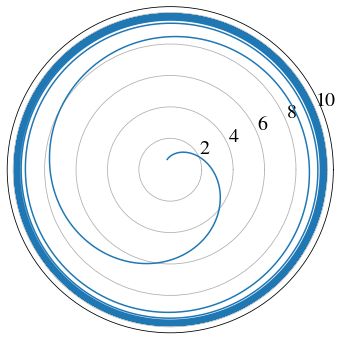

In [73]:
# Create Polar Coordinate Plot  (Note that we have selected only data from plunge-in phase)

ax = plt.subplot(111, projection='polar')
ax.plot(xnew, f2(xnew), '-')

ax.set_xticklabels([])

ax.xaxis.grid(False)

#ax.set_theta_zero_location('N')
#ax.set_yticks(np.arange(0,10,2))
#ax.set_theta_direction(-1)
#ax.yaxis.grid(False)
#ax.set_yticklabels([])

In [75]:
p = mr.MesaData(DATA+'LOGS/'+'profile1.data')

THETA = np.linspace(0, 360, 1000)
R = p.radius
RHO = p.mass # p.logRho

radii, thetas = np.meshgrid(R,THETA)
rhos, thetas = np.meshgrid(RHO,THETA)


print("R:{}".format(R.shape))

print("THETA:{}".format(THETA.shape))

print("RHO:{}".format(RHO.shape))

print("meshgrid radii:{}".format(radii.shape))

print("mehgrid thetas:{}".format(thetas.shape))

print("mehgrid rhos:{}".format(rhos.shape))


From read_log_data  5
From read_log_data header: [1, 2944, 1.0, 0.02, 126986.60192293832, 126986.60192293832, 4477.014202113597, 36.30617842218478, 10.015358178172267, 16.488216085029947, 0.0, 0.0, 0.9800980801829425, 5.353252817379811e-05, 0.00961472263090718, 0.00407141840484562, 0.002085024423875294, 1.0, 0.0, 0.5114880650177109, 0.0009944225593646941, 0.467528698645312, 0.0022639187690771715, 0.0038488970116273644, 0.0077137517437770925, 0.0020850244238750566, 0.24522801032158734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999998375103494, 9.993668097762235, 0.9999997764976601, 9.987294692285023, 317217.2418484212, 64764.03295192042, 275435213.35998094, 36.133693838047925, 36.133693838047925, 8.432890603038332e-17, 2.4748012408456033, 50.0, 1000.0, 4007392388843.3184, '15140']
R:(2944,)
THETA:(1000,)
RHO:(2944,)
meshgrid radii:(1000, 2944)
mehgrid thetas:(1000, 2944)
mehgrid rhos:(1000, 2944)


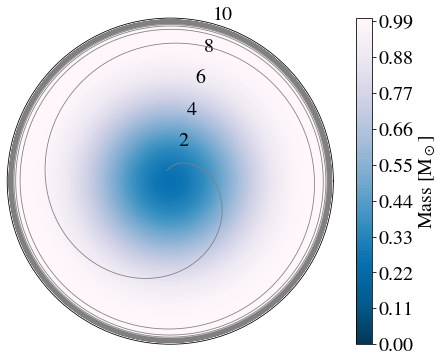

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.subplot(111, polar=True)

#ax.plot(thetas, radii, rho, marker='.', ls='none')

#contour_levels = [0.0000000001,0.000000001,0.00000001,0.0000001,
#                  0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0]

#cmap=cm.PuBu_r
#contour_levels = np.arange(5,-5,0.1)
#contour_levels = np.arange(1,0.000001,5,0.1)
contour_levels = np.arange(0,1.001,0.01)
CS = ax.contourf(thetas, radii, rhos, contour_levels,
                 cmap=cm.PuBu_r)#, locator=ticker.LogLocator())
cbar = plt.colorbar(CS)
cbar.set_label(r"Mass [M$_\odot$]")

ax.set_xticklabels([])
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_rlabel_position(75)
ax.plot(xnew, f2(xnew), '-',c='gray',lw=0.8)
#print(rhos)
plt.show()


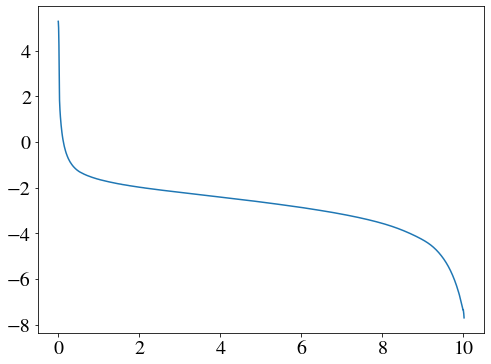

In [77]:
THETA = np.linspace(0, 360, 200)
R = p.radius
RHO = p.logRho

plt.plot(R,RHO)



NameError: name 'ticker' is not defined

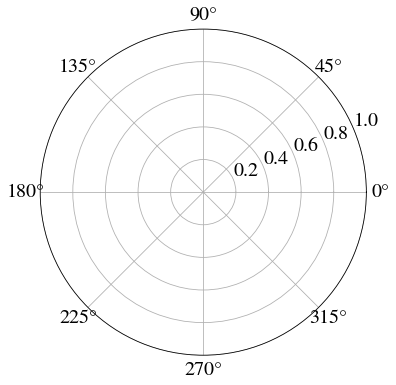

In [78]:

radii, thetas = np.meshgrid(R,THETA)
rhos, thetas = np.meshgrid(RHO,THETA)


ax = plt.subplot(111, polar=True)

#ax.plot(thetas, radii, rho, marker='.', ls='none')

#contour_levels = [0.0000000001,0.000000001,0.00000001,0.0000001,
#                  0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0]

#contour_levels = [5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7]
#contour_levels = contour_levels[::-1]
#cmap=cm.PuBu_r
#contour_levels = np.arange(5,-5,0.1)
#contour_levels = np.arange(1,0.000001,5,0.1)
#contour_levels = np.arange(0,1.1,0.1)
CS = ax.contourf(thetas, radii, rhos,
                 cmap=cm.plasma, locator=ticker.LogLocator())
cbar = plt.colorbar(CS)
cbar.set_label(r"$\log \rho$")

ax.set_xticklabels([])
ax.xaxis.grid(False)


#print(rhos)
plt.show()


In [ ]:
h = mr.MesaData(DATA+'/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)




In [ ]:
import mkipp
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[DATA+"LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'))
FILENAME = "kipp_eng_m.pdf"
plt.savefig(FILENAME)    


In [ ]:
import mkipp
h = mr.MesaData(DATA+'LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[DATA+"LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "model_number",yaxis='radius'),xlims = [0,2100])
